# 실습: 대기중 CO2농도 추세 제거

## 라이브러리 로딩

In [12]:
# 라이브러리 로딩
import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2

from module import stationarity_adf_test, stationarity_kpss_test

from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

## 데이터 셋 로딩

In [2]:
# 데이터 셋 로딩
raw_set = datasets.get_rdataset("co2", package="datasets")
raw = raw_set.data
raw

,time,value
0,"1,959.00",315.42
1,"1,959.08",316.31
2,"1,959.17",316.50
3,"1,959.25",317.56
4,"1,959.33",318.13
...,...,...
463,"1,997.58",362.57
464,"1,997.67",360.24
465,"1,997.75",360.83
466,"1,997.83",362.49


## 데이터 셋 시각화

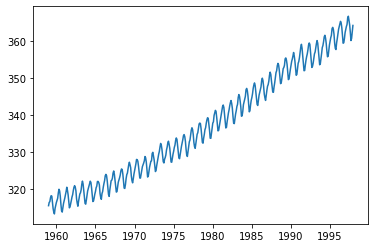

In [3]:
# 데이터 셋 시각화
# 시간에 따라 상승하는 추세를 확인할 수 있다.
plt.plot(raw['time'], raw['value'])

## 추세 선형 추정

In [4]:
# 추세 선형 추정
# value가 종속변수, time이 독립변수

result = sm.OLS.from_formula(formula = 'value~time', data=raw).fit()
print(result.params)
result.summary()

Intercept   -2,249.77
time             1.31
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.479e+04
Date:                Sat, 28 May 2022   Prob (F-statistic):               0.00
Time:                        10:46:58   Log-Likelihood:                -1113.5
No. Observations:                 468   AIC:                             2231.
Df Residuals:                     466   BIC:                             2239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2249.7742     21.268   -105.784      0.000   -2291.566   -2207.982
time           1.3075      0.011    121.634      0.000       1.286       1.329
==============================================================================
Omnibus:                       15.857   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.798
Skew:                           0.048   Prob(JB):                       0.0203
Kurtosis:                       2.375   Cond. No.                     3.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
print(raw['time'])
print("")
print(result.params[1])
print("")
print(result.params[1]*raw['time'])

0     1,959.00
1     1,959.08
2     1,959.17
3     1,959.25
4     1,959.33
        ...   
463   1,997.58
464   1,997.67
465   1,997.75
466   1,997.83
467   1,997.92
Name: time, Length: 468, dtype: float64

1.3074966906113805

0     2,561.39
1     2,561.49
2     2,561.60
3     2,561.71
4     2,561.82
        ...   
463   2,611.83
464   2,611.94
465   2,612.05
466   2,612.16
467   2,612.27
Name: time, Length: 468, dtype: float64


In [6]:
# trend를 계산해줍니다.
trend = result.params[0] + result.params[1]*raw['time']
trend

0     311.61
1     311.72
2     311.83
3     311.94
4     312.05
       ...  
463   362.06
464   362.17
465   362.28
466   362.39
467   362.50
Name: time, Length: 468, dtype: float64

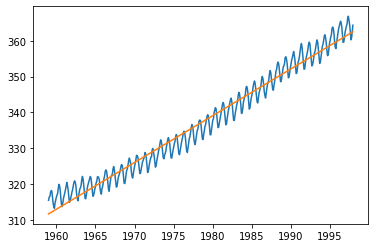

In [7]:
# trend 시각화
plt.plot(raw['time'], raw['value'], raw['time'], trend)

## 추세 비선형 추정

In [8]:
# 추세 비선형 추정

# "I(time**2)"에서 "I"는 Identity matrix라는 뜻으로 이걸 써줘야 된다.
result = sm.OLS.from_formula(formula='value~time+I(time**2)', data=raw).fit()
print(result.params)
result.summary()

Intercept      47,702.94
time              -49.19
I(time ** 2)        0.01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Sat, 28 May 2022   Prob (F-statistic):               0.00
Time:                        10:46:59   Log-Likelihood:                -1027.8
No. Observations:                 468   AIC:                             2062.
Df Residuals:                     465   BIC:                             2074.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.77e+04   3482.902     13.696      0.000    4.09e+04    5.45e+04
time           -49.1907      3.521    -13.971      0.000     -56.110     -42.272
I(time ** 2)     0.0128      0.001     14.342      0.000       0.011       0.015
==============================================================================
Omnibus:                       66.659   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.850
Skew:                          -0.116   Prob(JB):                     0.000133
Kurtosis:                       2.072   Cond. No.                     1.35e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# 비선형 추세를 계산합니다.
trend = result.params[0] + result.params[1] * raw.time + result.params[2] * raw.time**2
trend

0     314.83
1     314.89
2     314.96
3     315.03
4     315.10
       ...  
463   365.11
464   365.26
465   365.41
466   365.56
467   365.71
Name: time, Length: 468, dtype: float64

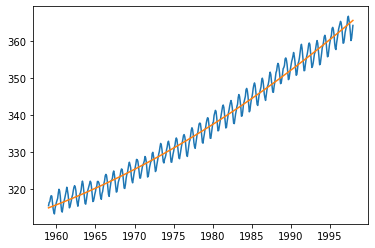

In [10]:
# 비선형 추세를 시각화합니다.
plt.plot(raw.time, raw.value, raw.time, trend)
plt.show()

## 정상성 테스트 방향

> **추세와 계절성 모두 제거된 정상성 데이터 변환 필요!**
>> - **ADF 정상성 확인 -> 추세가 제거되면 정상이라고 하는 경향이 있음**  
: ADF 검정통계량은 정상이라고 해도 데이터에 계절성이 남아있을 수 있음

>> - **KPSS 정상성 확인 -> 계절성이 제거되면 정상이라고 하는 경향이 있음**  
: KPSS 검정통계량은 정상이라고 해도 데이터에 추세가 남아있을 수 있음

## 추세 추정을 통한 추세제거

0      0.59
1      1.42
2      1.54
3      2.53
4      3.03
       ... 
463   -2.54
464   -5.02
465   -4.58
466   -3.07
467   -1.37
Length: 468, dtype: float64


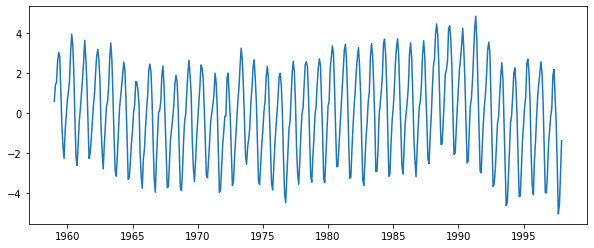

In [11]:
# 추세추정을 통한 추세제거 시각화

# result = sm.OLS.from_formula(formula='value~time+I(time**2)', data=raw).fit()
# 위의 식에서 파란색(오리지널 데이터)에서 주황색(추세)을 제거한 잔차를 활용합니다.
# Yt에서 trend를 제거한 것이 잔차입니다.
# 잔차는 result.resid에 있습니다.

print(result.resid)

plt.figure(figsize=(10, 4))
plt.plot(raw.time, result.resid)
plt.show()

In [12]:
# 추정을 통한 추세제거를 검정통계량으로 확인

display(stationarity_adf_test(result.resid, []))
display(stationarity_kpss_test(result.resid, []))

,Stationarity_adf
Test Statistics,-2.53
p-value,0.11
Used Lag,13.00
Used Observations,454.00
Critical Value(1%),-3.44
Maximum Information Criteria,260.10


,Stationarity_kpss
Test Statistics,0.17
p-value,0.10
Used Lag,18.00
Critical Value(10%),0.35


* adf 결과 시계열 데이터가 비정상
* kpss 결과 시계열 데이터가 정상

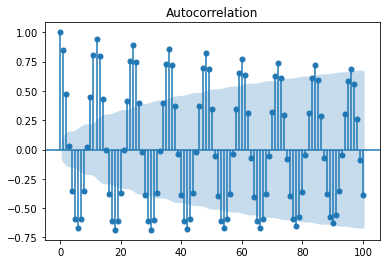

In [13]:
# 추정을 통한 추세제거를 acf를 통한 자기상관 시각화

sm.graphics.tsa.plot_acf(result.resid, lags=100, use_vlines=True)
plt.show()

* acf 결과 시계열 데이터에 계절성이 남아있음

**추정을 통한 추세저거 결론**

* adf 결과 시계열 데이터가 비정상
* kpss 결과 시계열 데이터가 정상
* acf 결과 시계열 데이터에 계절성이 남아있음, 비정상

## 차분을 통한 추세제거

In [14]:
# 차분을 통한 추세제거 
display_side_by_side(raw[['value']], raw[['value']].shift(1), raw[['value']].diff(1))

,value
0,315.42
1,316.31
2,316.50
3,317.56
4,318.13
5,318.00
6,316.39
7,314.65
8,313.68
9,313.18


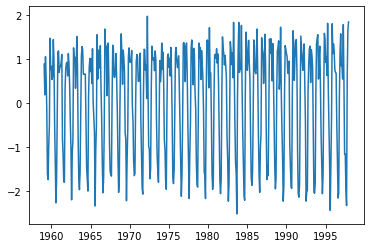

In [15]:
# 차분을 통한 추세제거 시각화
plt.plot(raw['time'][1:], raw['value'].diff(1).dropna())
plt.show()

In [16]:
# 차분을 통한 추세제거를 검정통계량으로 확인

# stationarity_adf_test(Y_Data, Target_name)
# adf 테스트(주로 추세제거에 쓰임)
# 귀무가설 : 시계열 데이터에는 단위근이 있다.
# 대립가설 : 시계열 데이터에는 단위근이 없다.
display(stationarity_adf_test(raw.value.diff(1).dropna(), []))

# stationarity_kpss_test(Y_Data, Target_name)
# kpss 테스트(adf랑 반대, 주로 계절성 제거에 쓰임)
# 귀무가설 : 시계열 데이터에는 단위근이 없다.
# 대립가설 : 시계열 데이터에는 단위근이 있다.
display(stationarity_kpss_test(raw.value.diff(1).dropna(), []))

,Stationarity_adf
Test Statistics,-5.14
p-value,0.00
Used Lag,12.00
Used Observations,454.00
Critical Value(1%),-3.44
Maximum Information Criteria,271.87


,Stationarity_kpss
Test Statistics,0.04
p-value,0.10
Used Lag,18.00
Critical Value(10%),0.35


* adf테스트 결과 시계얼 데이터에는 단위근이 없다.(추세제거)
* kpss테스트 결과 시계열 데이터에는 단위근이 없다.(계절성제거)

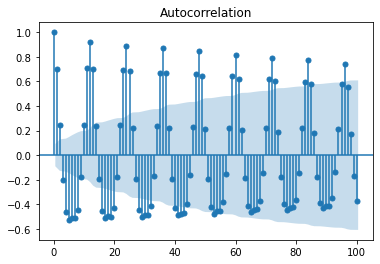

In [17]:
# 차분을 통한 추세제거를 acf를 통한 자기상관 시각화

# "lags=100"은 t시점과 t+1, t+2, t+3 ..... t+100시점과의 상관관계를 모두 그리라는 뜻입니다.
# x축은 시차, y축은 AutoCorrelation입니다.
# 0번째 값은 1입니다. 이유는 t시점의 잔차와 t시점과의 잔차를 나타내서 1로 나옵니다.
# x축의 연한게 그라데이션 되어있는 부분은 신뢰구간입니다. 저 범위를 벗어나면 AutoCorrelation이 있다고 판단합니다.

sm.graphics.tsa.plot_acf(raw.value.diff(1).dropna(), lags=100, use_vlines=True)
plt.show()

* acf결과 계절성이 남아있음

**차분을 통한 추세저거 결론**

* adf 결과 시계열 데이터가 정상
* kpss 결과 시계열 데이터가 정상
* acf 결과 시계열 데이터에 계절성이 남아있음, 비정상

# 실습: 호흡기질환 사망자수 계절성 제거

## 라이브러리 로딩

In [18]:
# 라이브러리 로딩
import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2

from module import stationarity_adf_test, stationarity_kpss_test

## 데이터 셋 로딩

In [19]:
# 데이터 셋 로딩
raw_set = datasets.get_rdataset("deaths", package="MASS")
raw = raw_set.data
raw

,time,value
0,"1,974.00",3035
1,"1,974.08",2552
2,"1,974.17",2704
3,"1,974.25",2554
4,"1,974.33",2014
...,...,...
67,"1,979.58",1354
68,"1,979.67",1333
69,"1,979.75",1492
70,"1,979.83",1781


In [20]:
print(len(raw))

# pd.date_range : Return a fixed frequency DatetimeIndex.
pd.date_range('1974-01-01', periods=len(raw), freq='M')

72


DatetimeIndex(['1974-01-31', '1974-02-28', '1974-03-31', '1974-04-30',
               '1974-05-31', '1974-06-30', '1974-07-31', '1974-08-31',
               '1974-09-30', '1974-10-31', '1974-11-30', '1974-12-31',
               '1975-01-31', '1975-02-28', '1975-03-31', '1975-04-30',
               '1975-05-31', '1975-06-30', '1975-07-31', '1975-08-31',
               '1975-09-30', '1975-10-31', '1975-11-30', '1975-12-31',
               '1976-01-31', '1976-02-29', '1976-03-31', '1976-04-30',
               '1976-05-31', '1976-06-30', '1976-07-31', '1976-08-31',
               '1976-09-30', '1976-10-31', '1976-11-30', '1976-12-31',
               '1977-01-31', '1977-02-28', '1977-03-31', '1977-04-30',
               '1977-05-31', '1977-06-30', '1977-07-31', '1977-08-31',
               '1977-09-30', '1977-10-31', '1977-11-30', '1977-12-31',
               '1978-01-31', '1978-02-28', '1978-03-31', '1978-04-30',
               '1978-05-31', '1978-06-30', '1978-07-31', '1978-08-31',
      

## 1974-01-31 ~ 1979-12-31로 날짜를 맞춰줍니다.

In [21]:
# 1974-01-31 ~ 1979-12-31로 날짜를 맞춰줍니다.
raw['time'] = pd.date_range('1974-01-01', periods=len(raw), freq='M')
raw['month'] = raw['time'].dt.month
raw

,time,value,month
0,1974-01-31,3035,1
1,1974-02-28,2552,2
2,1974-03-31,2704,3
3,1974-04-30,2554,4
4,1974-05-31,2014,5
...,...,...,...
67,1979-08-31,1354,8
68,1979-09-30,1333,9
69,1979-10-31,1492,10
70,1979-11-30,1781,11


## 데이터 셋 시각화

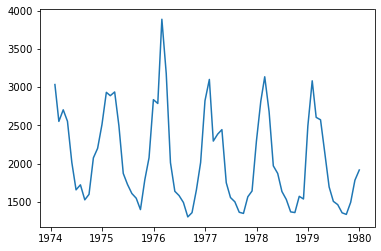

In [22]:
# 데이터 셋 시각화
plt.plot(raw['time'], raw['value'])

**계절성을 확인합니다.**

## 계절성 추정

In [23]:
# 계절성 추정

# C(month)은 1~12월까지 12개의 더미변수를 만드는 것, C()가 더미변수를 뜻함
# -1은 y절편을 반영하지 않음, 위에서 12개의 카테고리가 있는데 더미변수도 12개를 만들어서 상수항(y절편)이 있으면 안됨
result = sm.OLS.from_formula(formula='value ~ C(month) - 1', data=raw).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.66
Date:                Sat, 28 May 2022   Prob (F-statistic):           6.55e-21
Time:                        10:47:03   Log-Likelihood:                -494.38
No. Observations:                  72   AIC:                             1013.
Df Residuals:                      60   BIC:                             1040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2959.3333    103.831     28.502      0.000    2751.641    3167.025
C(month)[2]   2894.6667    103.831     27.879      0.000    2686.975    3102.359
C(month)[3]   2743.0000    103.831     26.418      0.000    2535.308    2950.692
C(month)[4]   2269.6667    103.831     21.859      0.000    2061.975    2477.359
C(month)[5]   1805.1667    103.831     17.386      0.000    1597.475    2012.859
C(month)[6]   1608.6667    103.831     15.493      0.000    1400.975    1816.359
C(month)[7]   1550.8333    103.831     14.936      0.000    1343.141    1758.525
C(month)[8]   1408.3333    103.831     13.564      0.000    1200.641    1616.025
C(month)[9]   1397.3333    103.831     13.458      0.000    1189.641    1605.025
C(month)[10]  1690.0000    103.831     16.277      0.000    1482.308    1897.692
C(month)[11]  1874.0000    103.831     18.049      0.000    1666.308    2081.692
C(month)[12]  2478.5000    103.831     23.871      0.000    2270.808    2686.192
==============================================================================
Omnibus:                       19.630   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.630
Skew:                           0.787   Prob(JB):                     1.67e-11
Kurtosis:                       6.750   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

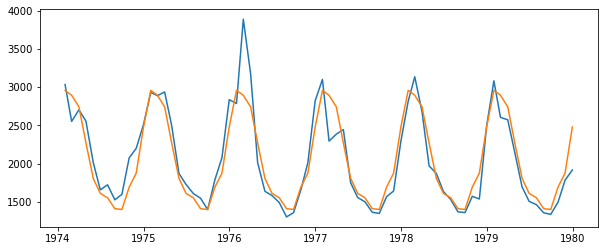

In [24]:
# 계절성 시각화
# fittedvalues은 OLS를 통한 추정값입니다.

plt.figure(figsize=(10,4))
plt.plot(raw.time, raw.value, raw.time, result.fittedvalues)
plt.show()

## 추정을 통한 계절성 제거

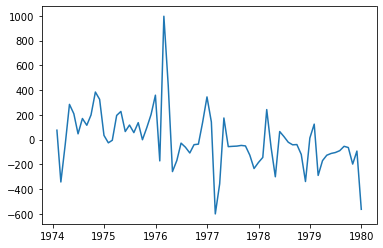

In [25]:
plt.plot(raw.time, result.resid)
plt.show()

In [26]:
display(stationarity_adf_test(result.resid, []))
display(stationarity_kpss_test(result.resid, []))

,Stationarity_adf
Test Statistics,-5.84
p-value,0.00
Used Lag,0.00
Used Observations,71.00
Critical Value(1%),-3.53
Maximum Information Criteria,812.36


,Stationarity_kpss
Test Statistics,0.54
p-value,0.03
Used Lag,12.00
Critical Value(10%),0.35


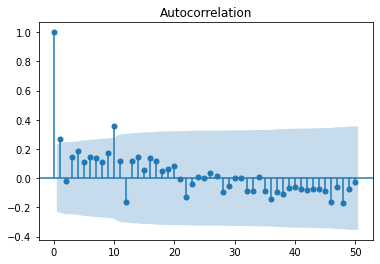

In [27]:
sm.graphics.tsa.plot_acf(result.resid, lags=50, use_vlines=True)
plt.show()

**추정을 통한 계절성 제거**
* adf 결과 시계열 데이터가 정상
* kpss 결과 시계열 데이터가 비정상
* acf 결과 시계열 데이터에 계절성 없음, 데이터가 정상

## 차분을 통한 계절성 제거

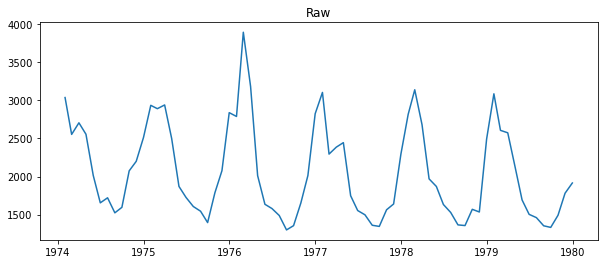

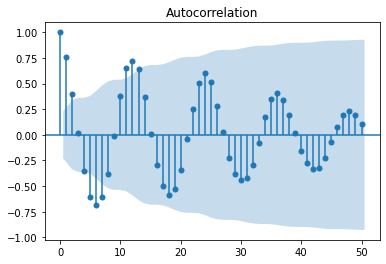

In [28]:
# 원본 데이터의 그래프와 ACF를 확인합니다.

plt.figure(figsize=(10,4))

plt.plot(raw.time, raw.value)
plt.title('Raw')
plt.show()

sm.graphics.tsa.plot_acf(raw.value, lags=50, use_vlines=True)
plt.show()

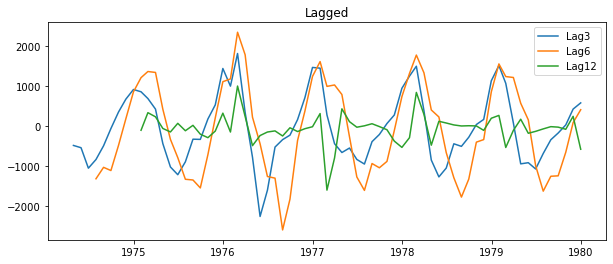

In [29]:
# 3,6,12 차례로 차분한 데이터를 시각화합니다.

plt.figure(figsize = (10,4))

seasonal_lag = 3
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 6
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 12
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
plt.title('Lagged')
plt.legend()
plt.show()

,Stationarity_adf
Test Statistics,-5.57
p-value,0.00
Used Lag,10.00
Used Observations,58.00
Critical Value(1%),-3.55
Maximum Information Criteria,826.27
,Stationarity_kpss
Test Statistics,0.36
p-value,0.09
Used Lag,11.00


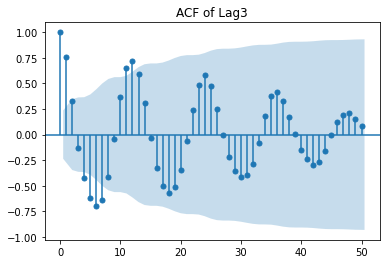

In [30]:
# 3차분
seasonal_lag = 3
display_side_by_side(stationarity_adf_test(raw.value.diff(seasonal_lag).dropna(), []), 
                     stationarity_kpss_test(raw.value.diff(seasonal_lag).dropna(), []))
sm.graphics.tsa.plot_acf(raw.value.diff(seasonal_lag).dropna(), lags=50, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.show()

,Stationarity_adf
Test Statistics,-4.30
p-value,0.00
Used Lag,11.00
Used Observations,54.00
Critical Value(1%),-3.56
Maximum Information Criteria,786.67
,Stationarity_kpss
Test Statistics,0.35
p-value,0.10
Used Lag,11.00


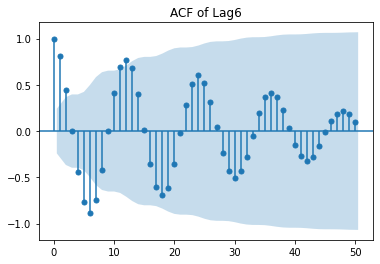

In [31]:
# 6차분
seasonal_lag = 6
display_side_by_side(stationarity_adf_test(raw.value.diff(seasonal_lag).dropna(), []), 
                     stationarity_kpss_test(raw.value.diff(seasonal_lag).dropna(), []))
sm.graphics.tsa.plot_acf(raw.value.diff(seasonal_lag).dropna(), lags=50, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.show()

,Stationarity_adf
Test Statistics,-2.14
p-value,0.23
Used Lag,11.00
Used Observations,48.00
Critical Value(1%),-3.57
Maximum Information Criteria,703.72
,Stationarity_kpss
Test Statistics,0.09
p-value,0.10
Used Lag,11.00


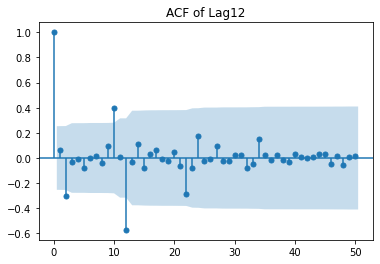

In [32]:
# 12차분
seasonal_lag = 12
display_side_by_side(stationarity_adf_test(raw.value.diff(seasonal_lag).dropna(), []), 
                     stationarity_kpss_test(raw.value.diff(seasonal_lag).dropna(), []))
sm.graphics.tsa.plot_acf(raw.value.diff(seasonal_lag).dropna(), lags=50, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.show()

**계절성이 있는 시차만큼 차분을 해야 계절성이 제거됩니다.**

# 실습: 랜덤워크의 정상성 변환

## 라이브러리 호출

In [33]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import statsmodels.api as sm
from random import seed, random
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

## 랜덤워크 차분

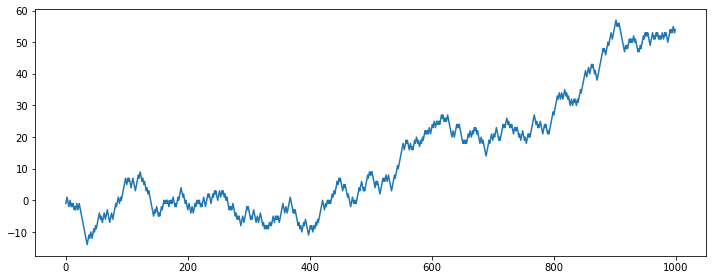

'위쪽 : 차분 전, 아래쪽 : 차분 후'

,Stationarity_adf
Test Statistics,0.34
p-value,0.98
Used Lag,0.00
Used Observations,999.00
Critical Value(1%),-3.44
Maximum Information Criteria,"2,773.39"
,Stationarity_kpss
Test Statistics,3.75
p-value,0.01
Used Lag,22.00


'왼쪽 : 차분 전, 오른쪽 : 차분 후'

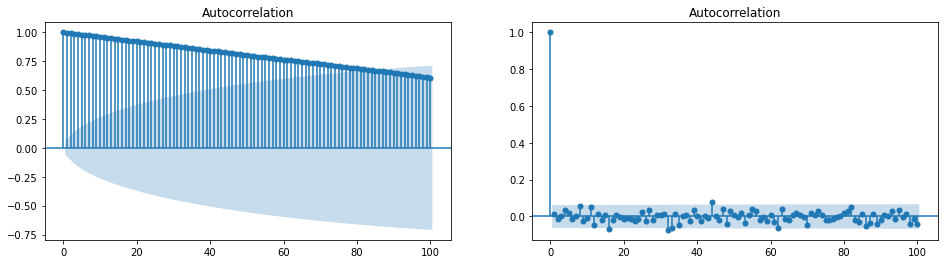

In [34]:
# 랜덤워크 데이터 생성
plt.figure(figsize=(10, 4))
seed(1)
random_walk = [-1 if random() < 0.5 else 1]
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
plt.plot(random_walk)
plt.tight_layout()
plt.show()

# 차분 전,후 랜덤워크 정상성 테스트
display('위쪽 : 차분 전, 아래쪽 : 차분 후')
display_side_by_side(stationarity_adf_test(random_walk, []), stationarity_kpss_test(random_walk, []), stationarity_adf_test(pd.Series(random_walk).diff(1).dropna(), []),stationarity_kpss_test(pd.Series(random_walk).diff(1).dropna(), []))

display('왼쪽 : 차분 전, 오른쪽 : 차분 후')
fig, axs = plt.subplots(1, 2, figsize = (16,4))

sm.graphics.tsa.plot_acf(random_walk, lags=100, use_vlines=True, ax = axs[0])
sm.graphics.tsa.plot_acf(pd.Series(random_walk).diff(1).dropna(), lags=100, use_vlines=True, ax = axs[1])
plt.show()

# 차분 후 랜덤워크 정상성 테스트
# display('After a difference:')
# display_side_by_side(stationarity_adf_test(pd.Series(random_walk).diff(1).dropna(), []),stationarity_kpss_test(pd.Series(random_walk).diff(1).dropna(), []))
# sm.graphics.tsa.plot_acf(pd.Series(random_walk).diff(1).dropna(), lags=100, use_vlines=True)
# plt.show()

## 단위근이 있으면 Random Walk이 되는 이유

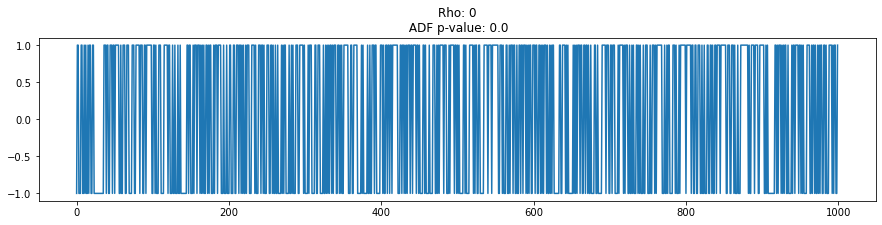

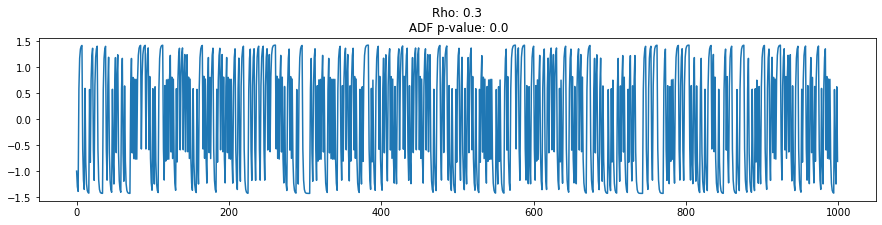

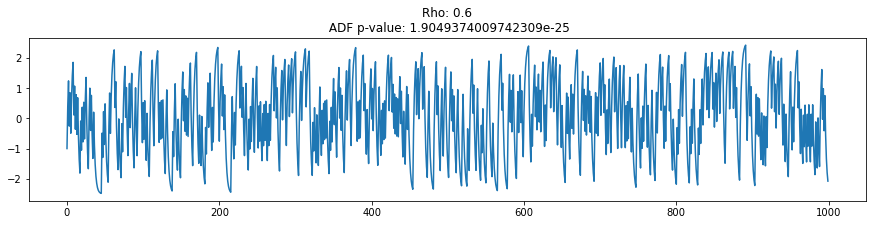

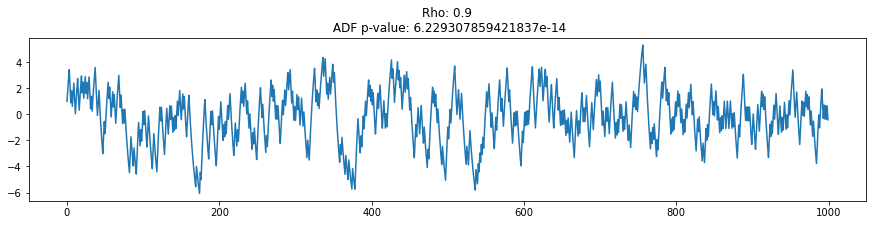

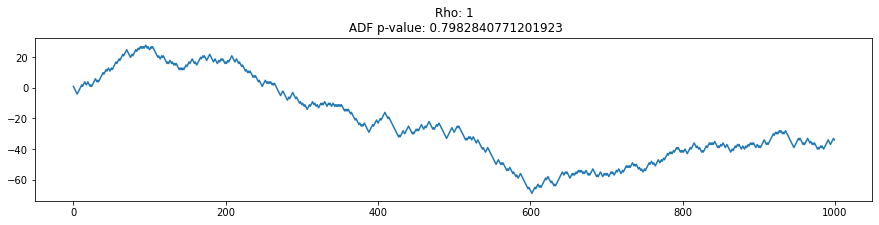

In [35]:
# Random Walk : Yt = Yt-1 + et 
# 단위근은 Yt-1의 앞의 계수가 "1"이라는 뜻

seed(1)
rho_list = [0, 0.3, 0.6, 0.9, 1]

for rho in rho_list :
    random_walk = [-1 if random() < 0.5 else 1]
    for i in range(1, 1000):
        movement = -1 if random() < 0.5 else 1
        value = rho * random_walk[i-1] + movement
        random_walk.append(value)
    plt.figure(figsize = (15,3))
    plt.title('Rho: {}\n ADF p-value: {}'.format(rho, np.ravel(stationarity_adf_test(random_walk, []))[1]))
    plt.plot(random_walk)
    plt.show()

In [36]:
# np.ravel은 다차원 배열을 1차원으로 만들어줍니다.

display(stationarity_adf_test(random_walk, []))
print("")
print(np.ravel(stationarity_adf_test(random_walk, [])))
print("")
print(np.ravel(stationarity_adf_test(random_walk, []))[1])

,Stationarity_adf
Test Statistics,-0.87
p-value,0.80
Used Lag,2.00
Used Observations,997.00
Critical Value(1%),-3.44
Maximum Information Criteria,"2,769.75"



[-8.68137463e-01  7.98284077e-01  2.00000000e+00  9.97000000e+02
 -3.43692594e+00  2.76975472e+03]

0.7982840771201923


# 실습: 항공사 승객수요 스케일 변환(Log/Box-Cox)

## 라이브러리 로딩

In [45]:
# 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

## 데이터 셋 로딩

In [46]:
# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
raw = data.data.copy()
raw

,time,value
0,"1,949.00",112
1,"1,949.08",118
2,"1,949.17",132
3,"1,949.25",129
4,"1,949.33",121
...,...,...
139,"1,960.58",606
140,"1,960.67",508
141,"1,960.75",461
142,"1,960.83",390


## 데이터셋 시각화

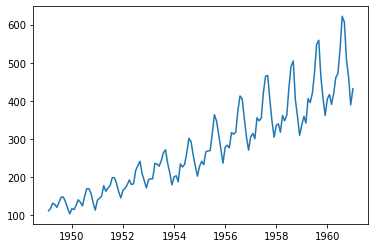

In [47]:
# 1949-01-31 ~ 1960-12-31로 날짜를 맞춰줍니다.
raw['time'] = pd.date_range('1949-01-01', periods=len(raw), freq='M')
plt.plot(raw['time'], raw['value'])
plt.show()

Optimal Lambda:  0.14802265137037945


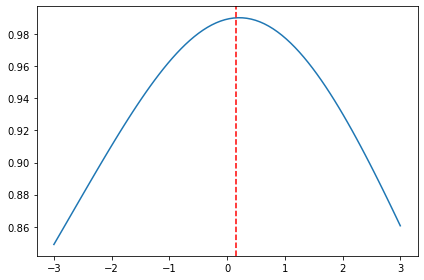

In [52]:
# Box-Cox 변환 모수 추정
# 정규분포의 특정 범위(x)에서 lambda를 바꿔가며 정규성(measure:y)이 가장 높은 lambda(l_opt)를 선정
x, y = sp.stats.boxcox_normplot(raw.value, la=-3, lb=3)
y_transfer, l_opt = sp.stats.boxcox(raw.value)
print('Optimal Lambda: ', l_opt)

plt.plot(x, y)
plt.axvline(x=l_opt, color='r', ls="--")
plt.tight_layout()
plt.show()

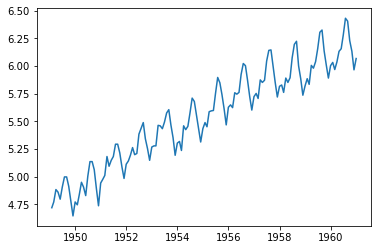

In [54]:
# y축에 자연로그를 씌웁니다.
# 로그는 y축의 분산이 시간이 흐르면서 점점 커질 때 분산을 일정하기 위해서 사용합니다.
plt.plot(raw['time'], np.log(raw['value']))

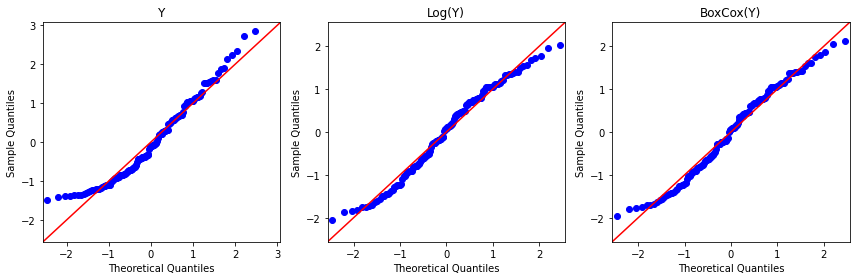

In [50]:
plt.figure(figsize=(12,4))
sm.qqplot(raw.value, fit=True, line='45', ax=plt.subplot(131))
plt.title('Y')
sm.qqplot(np.log(raw.value), fit=True, line='45', ax=plt.subplot(132))
plt.title('Log(Y)')
sm.qqplot(y_transfer, fit=True, line='45', ax=plt.subplot(133))
plt.title('BoxCox(Y)')
plt.tight_layout()
plt.show()

# 실습: 항공사 승객수요 정상성 변환

## 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

## 데이터 셋 로딩

In [2]:
data = sm.datasets.get_rdataset("AirPassengers")
raw = data.data.copy()
raw 

,time,value
0,"1,949.00",112
1,"1,949.08",118
2,"1,949.17",132
3,"1,949.25",129
4,"1,949.33",121
...,...,...
139,"1,960.58",606
140,"1,960.67",508
141,"1,960.75",461
142,"1,960.83",390


## 데이터 전처리

In [6]:
raw.index = pd.date_range(start = '1/1/1949', periods = len(raw['time']), freq = 'M')
del raw['time']

In [7]:
raw

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


## 정상성 확보

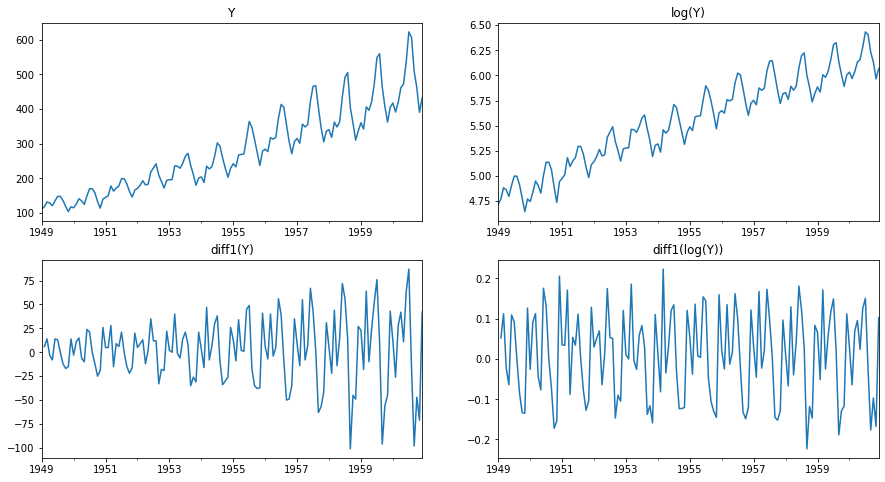

In [10]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))

raw.plot(title = 'Y', legend = False, ax = axs[0][0])
np.log(raw).plot(title = 'log(Y)', legend = False, ax = axs[0][1])
raw.diff(1).plot(title = 'diff1(Y)', legend = False, ax = axs[1][0])
np.log(raw).diff(1).plot(title = 'diff1(log(Y))', legend = False, ax = axs[1][1])
plt.show()

**Y데이터는 시간이 흐르면서 평균과 분산이 커지고 반복되는 계절성이 보임**
* log(Y)는 시간에 지나도 분산이 일정 
    * 시간에 따라 분산이 커질 때 로그를 씌우면 시간에 따른 분산이 일정해지는 경향이 있음

* diff1(Y)는 시간이 지나도 평균이 0으로 일정, 하지만 분산은 점점 커짐
    * 차분은 추세와 계절성을 제거하기 위해 사용

* diff1(log(Y))는 시간이 지나도 평균이 0이고 분산이 일정
    * 로그와 차분을 모두 사용해 추세를 제거하고 분산이 일정해짐

## 미변환 Y의 정상성테스트

,Stationarity_adf
Test Statistics,0.82
p-value,0.99
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,996.69
,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00


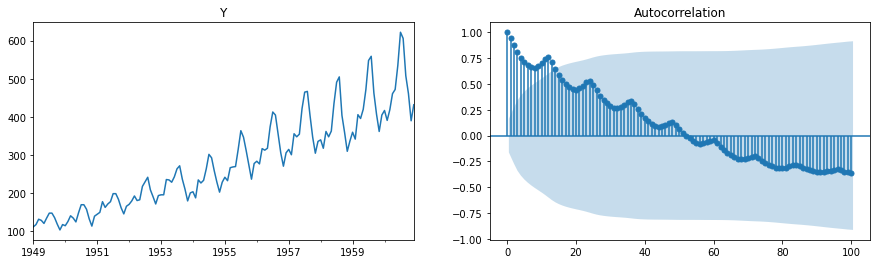

In [18]:
# 미변환
display_side_by_side(stationarity_adf_test(raw.values.flatten(), []), 
                     stationarity_kpss_test(raw.values.flatten(), []))

fig, axs = plt.subplots(1, 2, figsize = (15, 4))
raw.plot(title='Y', legend=False, ax=axs[0])
sm.graphics.tsa.plot_acf(raw, lags=100, use_vlines=True, ax=axs[1])
plt.show()

* adf 결과 귀무가설 채택 : 시계열 데이터가 비정상
* kpss 결과 귀무가설 기각, 대립가설 채택 : 시계열 데이터가 비정상    
* ACF 결과 데이터에 계절성이 보임

## 로그변환 Y의 정상성테스트

,Stationarity_adf
Test Statistics,-1.72
p-value,0.42
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,-445.40
,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00


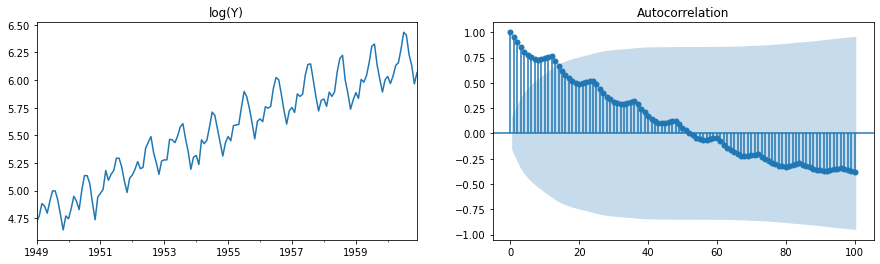

In [20]:
# 로그변환
display_side_by_side(stationarity_adf_test(np.log(raw).values.flatten(), []), 
                     stationarity_kpss_test(np.log(raw).values.flatten(), []))

fig, axs = plt.subplots(1, 2, figsize = (15, 4))
np.log(raw).plot(title='log(Y)', legend=False, ax=axs[0])
sm.graphics.tsa.plot_acf(np.log(raw), lags=100, use_vlines=True, ax=axs[1])
plt.show()

* adf 결과 귀무가설 채택 : 시계열 데이터가 비정상
* kpss 결과 귀무가설 기각, 대립가설 채택 : 시계열 데이터가 비정상    
* ACF 결과 데이터에 계절성이 보임

## 로그, 추세(1차 차분) 변환 Y의 정상성테스트

,Stationarity_adf
Test Statistics,-2.72
p-value,0.07
Used Lag,14.00
Used Observations,128.00
Critical Value(1%),-3.48
Maximum Information Criteria,-440.36
,Stationarity_kpss
Test Statistics,0.10
p-value,0.10
Used Lag,14.00


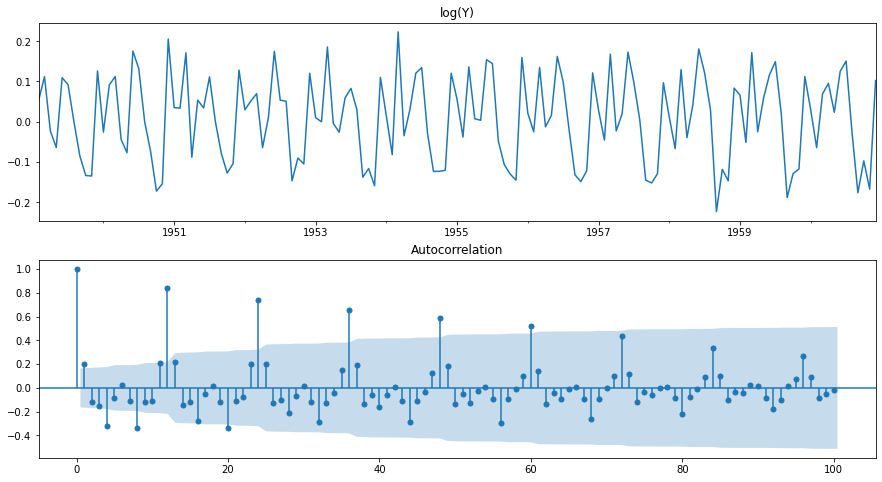

In [61]:
display_side_by_side(stationarity_adf_test(np.log(raw).diff(1).dropna().values.flatten(), []), 
                     stationarity_kpss_test(np.log(raw).diff(1).dropna().values.flatten(), []))

fig, axs = plt.subplots(2, 1, figsize = (15, 8))
np.log(raw).diff(1).dropna().plot(title='log(Y)', legend=False, ax=axs[0])
sm.graphics.tsa.plot_acf(np.log(raw).diff(1).dropna(), lags=100, use_vlines=True, ax=axs[1])
plt.show()

* adf 결과 : 10% 유의수준하에 귀무가설 기각 ,대립가설 채택 : 시계열 데이터 정상
* kpss 결과 : 10% 유의수준하에 귀무가설 채택 : 시계열 데이터 정상
* acf 결과 : 계절성이 여전히 남아있음

## 로그, 추세(1차차분), 계절 변환 Y의 정상성 테스트

In [53]:
# 넘파이의 argmax()는 배열에서 가장 큰 값의 인덱스를 찾아줍니다.
# 12번에 1번씩 큰 값이 반복되는 것 같습니다.

print(sm.tsa.acf(np.log(raw).diff(1).dropna()).shape)
print("")
print(sm.tsa.acf(np.log(raw).diff(1).dropna()))
print("")
print(sm.tsa.acf(np.log(raw).diff(1).dropna())[1:].argmax())

(41,)

[ 1.          0.19975134 -0.12010433 -0.15077204 -0.32207432 -0.08397453
  0.02577843 -0.11096075 -0.33672146 -0.11558631 -0.10926704  0.20585223
  0.84142998  0.21508704 -0.13955394 -0.11599576 -0.27894284 -0.05170646
  0.01245814 -0.1143576  -0.33717439 -0.1073849  -0.0752112   0.19947518
  0.7369207   0.19726236 -0.1238843  -0.10269904 -0.21099219 -0.06535684
  0.01572846 -0.11537038 -0.28925562 -0.12688236 -0.04070684  0.14741061
  0.6574381   0.19290864 -0.13431247 -0.06023711 -0.1627056 ]

11


,Stationarity_adf
Test Statistics,-4.44
p-value,0.00
Used Lag,12.00
Used Observations,118.00
Critical Value(1%),-3.49
Maximum Information Criteria,-415.56
,Stationarity_kpss
Test Statistics,0.11
p-value,0.10
Used Lag,13.00


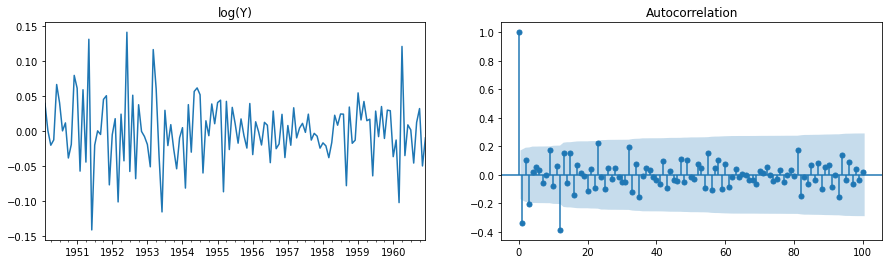

In [52]:
# 로그, 추세(1차 차분), 계절성(12차 차분)을 해줍니다.
# diff(12)로 계절성 차분을 해줍니다.

display_side_by_side(stationarity_adf_test(np.log(raw).diff(1).dropna().diff(12).dropna().values.flatten(), []), 
                     stationarity_kpss_test(np.log(raw).diff(1).dropna().diff(12).dropna().values.flatten(), []))

fig, axs = plt.subplots(1, 2, figsize = (15, 4))
np.log(raw).diff(1).dropna().diff(12).dropna().plot(title='log(Y)', legend=False, ax=axs[0])
sm.graphics.tsa.plot_acf(np.log(raw).diff(1).dropna().diff(12).dropna(), lags=100, use_vlines=True, ax=axs[1])
plt.show()

* adf 결과 귀무가설 기각 ,대립가설 채택 : 시계열 데이터 정상
* kpss 결과 : 10% 유의수준하에 귀무가설 채택 : 시계열 데이터 정상
* acf 결과 : 계절성이 사라짐